In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_63621_R')

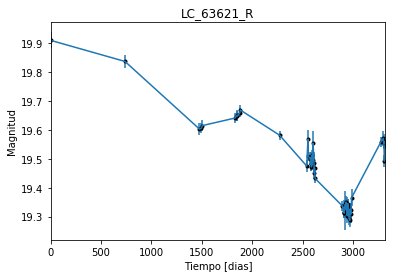

In [2]:
data = np.genfromtxt('LC_63621_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_63621_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

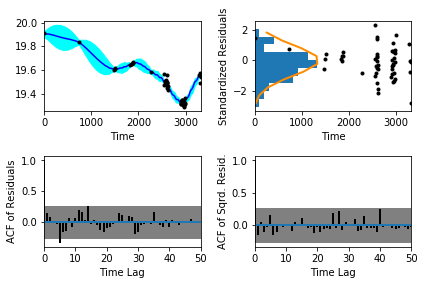

In [5]:
sample.assess_fit()

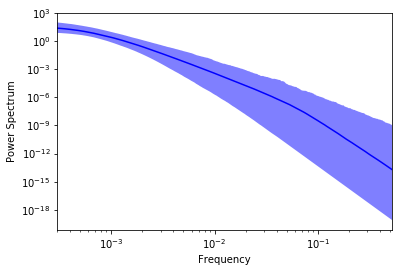

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_63621_R')

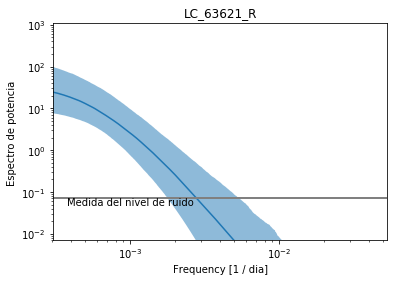

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_63621_R')

Text(0.5,1,'Prediccion , valor esperado LC_63621_R')

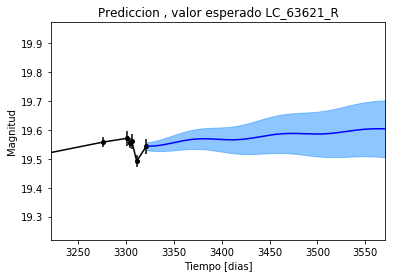

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_63621_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_63621_R')

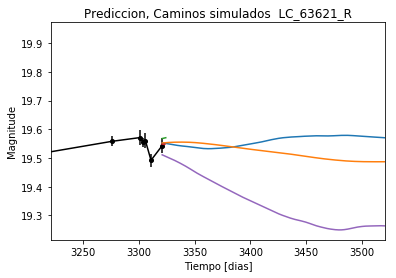

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_63621_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_63621_R')

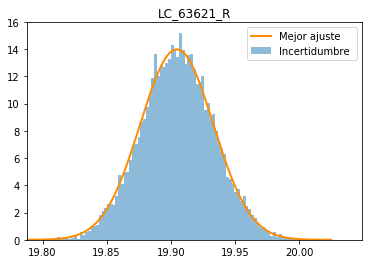

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_63621_R')

Text(0.5,1,'Interpolacion, camino simulado LC_63621_R')

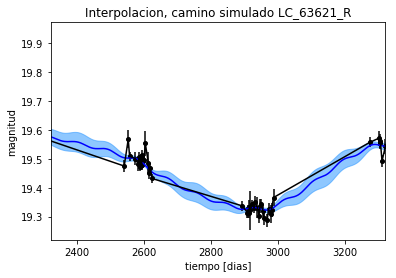

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63621_R')

Text(0.5,1,'Interpolacion, camino simulado LC_63621_R')

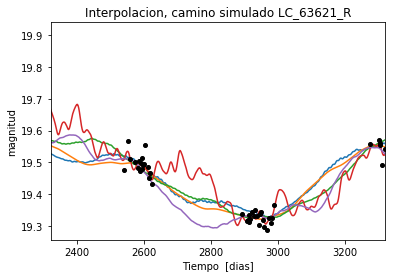

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63621_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 475.556058162
Median: 0.0111254290603
Standard deviation: 0.202546142319
68% credibility interval: [ 0.00088311  0.21858944]
95% credibility interval: [  3.48277225e-04   7.59561321e-01]
99% credibility interval: [  3.10118042e-04   9.96691751e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 456.885362354
Median: 0.000834930363022
Standard deviation: 0.0556242856667
68% credibility interval: [ 0.00037723  0.01007768]
95% credibility interval: [ 0.0003109  0.1847157]
99% credibility interval: [  3.03366373e-04   4.08207331e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 242.56864807
Median: 0.00706222963188
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1543.40012926
Median: 130.3408641
Standard deviation: 1.58953673285
68% credibility interval: [ 128.56163995  131.44512605]
95% credibility interval: [ 125.9749285   131.99311077]
99% credibility interval: [ 123.93367419  132.18890214]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 327.543066068
Median: 0.522755390679
Standard deviation: 2.25954871158
68% credibility interval: [ 0.0417306   3.94302345]
95% credibility interval: [ 0.01251094  7.87013402]
99% credibility interval: [  8.93518835e-03   9.88449817e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 346.883216008
Median: 0.175646918749
Standard deviation: 6.49559227669
68% credibility interval: [ 0.00783532  5.37985683]
95% credibility interval: [  6.1

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 750.371642109
Median: 4.71909142944e-44
Standard deviation: 6.23575927582
68% credibility interval: [  1.58642473e-104   4.57688672e-011]
95% credibility interval: [  3.20749393e-122   8.36591924e-002]
99% credibility interval: [  5.92779474e-125   2.35868487e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2279.65209096
Median: 19.6591032238
Standard deviation: 0.120350268451
68% credibility interval: [ 19.55996232  19.76297198]
95% credibility interval: [ 19.41822857  19.89723037]
99% credibility interval: [ 19.26868899  20.04604336]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 6824.03421294
Median: 0.000109761013975
Standard deviation: 0.188338734877
68% credibility interval: [ 0.          0.15984623]
95% credibility interval: [ 0.          0.73812552]
99% credibility interval: [ 0.          0.97129028]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 6824.03421294
Median: 0.000109761013975
Standard deviation: 0.188338734877
68% credibility interval: [ 0.          0.15984623]
95% credibility interval: [ 0.          0.73812552]
99% credibility interval: [ 0.          0.97129028]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1315.8719299
Median: 0.0
Standard deviation: 0.000156363842801
68%

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1543.40012926
Median: 130.3408641
Standard deviation: 1.58953673285
68% credibility interval: [ 128.56163995  131.44512605]
95% credibility interval: [ 125.9749285   131.99311077]
99% credibility interval: [ 123.93367419  132.18890214]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1739.22941401
Median: 0.037884853903
Standard deviation: 0.0445664817257
68% credibility interval: [ 0.02125055  0.07317752]
95% credibility interval: [ 0.01356377  0.1561283 ]
99% credibility interval: [ 0.01073359  0.27489379]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1688.75300265
Median: 1.02023297466
Standard deviation: 0.161283466637
68% credibility interval: [ 0.87443428  1.18993968]
95% credibility interval: [ 0.76147023  1.38706094]
99% credibility interval: [ 0.70993119  1.5468383 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 3375.83147062
Median: 1.6988053409e-05
Standard deviation: 0.00254958227497
68% credibility interval: [  5.36354405e-07   5.27380989e-04]
95% credibility interval: [  3.06727215e-08   2.93996246e-03]
99% credibility interval: [  7.30259062e-09   7.42686071e-03]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 475.556058162
Median: (-0.0699031324076+0j)
Standard deviation: 1.73780251109
68% credibility interval: [-1.37343795-0.5096888j  -0.00554872-0.05254558j]
95% credibility interval: [ -4.77246453e+00+0.j          -2.18829034e-03-0.00304286j]
99% credibility interval: [ -6.26239897e+00+0.j          -1.94852912e-03-0.39172421j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 456.885362354
Median: (-0.00524602218946+0j)
Standard deviation: 1.2338989025
68% credibility interval: [-0.06331993+0.40735837j -0.00237021+0.j        ]
95% credibility interval: [-1.16060300+0.j -0.00195346+0.j]
99% credibility interval: [ -2.56484231e+00+5.94625062j  -1.90610713e-03+0.j        ]
Posterior summary for parameter ar_roots  element 2
--